<p style="padding: 10px;
          color:#31A919;
          font-family:Verdana;
          text-align: center;
          font-size:220%;">
CRM Analytics

</p>


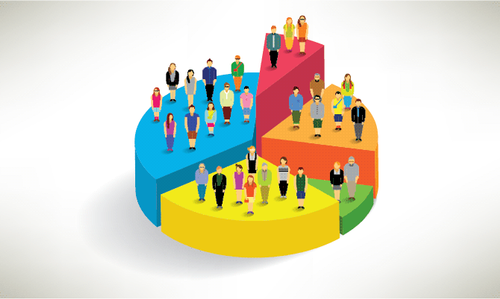
<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "border:2px solid #31A919; background-color:#31A919; color:white; font-family:Verdana;font-size:140%;">Notebook Content</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="profile" target="_self" style = "color:#31A919; font-family:Verdana;font-size:140%;">Libraries and Utilities<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#31A919; font-family:Verdana;font-size:140%;">Load and Check Data<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:140%;">Understanding Data<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:140%;">Data Preprocessing<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:140%;">RFM Analysis<span class="badge badge-primary badge-pill">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:140%;">K-Means Clustering<span class="badge badge-primary badge-pill">6</span></a>
      <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" target="_self" style = "color:#31A919; font-family:Verdana;font-size:140%;">Customer Lifetime Value<span class="badge badge-primary badge-pill">7</span></a>

</div>
</div>
</div>

<a id = "1"></a>
    
<span style=" font-family:Verdana; font-size:220%; color:#31A919; ">Libraries and Utilities</span>

In [ ]:
!pip install plotly
!pip install Lifetimes

In [ ]:
import os
import warnings
import pandas as pd 
import numpy as np
import datetime as dt

import seaborn as sns
sns.set_style('whitegrid')
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)
from lifetimes.plotting import plot_period_transactions
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter

warnings.filterwarnings('ignore')
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<a id = "2"></a>
<span style=" font-family:Verdana; font-size:220%; color:#31A919; ">Load and Check Data</span>

In [ ]:
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', header= 0, encoding= 'unicode_escape')
df.head()

<a id = "3"></a>
<span style=" font-family:Verdana; font-size:220%; color:#31A919; ">Understanding Data</span>


<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Context
    
Typically e-commerce datasets are proprietary and consequently hard to find among publicly available data. However, The UCI Machine Learning Repository has made this dataset containing actual transactions from 2010 and 2011. The dataset is maintained on their site, where it can be found by the title "Online Retail".

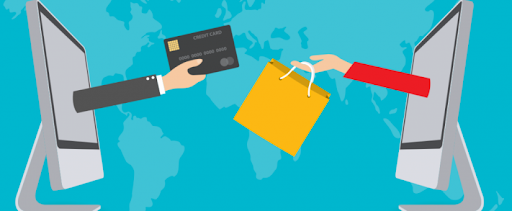

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Variable Description
    
- **InvoiceNo:** Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.
- **StockCode:** Product code that consists 5 digits.
- **Description:** Product name.
- **Quantity:** The quantities of each product per transaction.
- **InvoiceDate:** Represents the day and time when each transaction was generated.
- **UnitPrice:** Product price per unit.
- **CustomerID:** Customer number that consists 5 digits. Each customer has a unique customer ID.
- **Country:** Name of the country where each customer resides.

In [ ]:
def check_df(dataframe, head=5):
    print(" SHAPE ".center(70,'#'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'#'))
    print(dataframe.dtypes)
    print(" HEAD ".center(70,'#'))
    print(dataframe.head(head))
    print(" TAIL ".center(70,'#'))
    print(dataframe.tail(head))
    print(" MISSING VALUES ".center(70,'#'))
    print(dataframe.isnull().sum())
    print(" QUANTILES ".center(70,'#'))
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_df(df)

In [ ]:
world_map = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
world_map = world_map.reset_index(drop = False)
countries = world_map['Country'].value_counts()
data = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names',
            z = countries,
            text = countries.index,
            colorbar = {'title':'Orders'},
            colorscale='Plasma',
            reversescale = False)

layout = dict(title={'text': "Number of Orders by Countries",
                     'y':0.9,
                     'x':0.5,
                     'xanchor': 'center',
                     'yanchor': 'top'},
              geo = dict(resolution=50,
                         showocean=True,
                         oceancolor="LightBlue",
                         showland=True,
                         landcolor="Gray",
                         showframe = True),
             template = 'plotly_white')

choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Descriptive Statistics

In [ ]:
def desc_stats(dataframe):
    desc = dataframe.describe().T
    desc_df = pd.DataFrame(index= dataframe.columns, 
                           columns= desc.columns,
                           data= desc)
    
    f,ax = plt.subplots(figsize=(10,
                                 desc_df.shape[0]*0.78))
    sns.heatmap(desc_df,
                annot=True,
                cmap = "Wistia",
                fmt= '.2f',
                ax=ax,
                linecolor='white',
                linewidths = 1.3,
                cbar = False,
                annot_kws={"size": 12})
    plt.xticks(size = 18)
    plt.yticks(size = 14,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df[[col for col in df.columns if df[col].dtype != 'O']])

- It is clearly seems that there are ouliters in Quantity and UnitPrice that have to be removed.
- There are negative values in UnitPrice and Quantity because of cancelled orders.
- Quantity and Unit Price should be multiplied to create Total Price.
- Missing values in Customer ID and Description.
- InvoiceDate should be datetime, not object.

<a id = "4"></a>
<span style=" font-family:Verdana; font-size:220%; color:#31A919; ">Data Preprocessing</span>
    
<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Missing Values

In [ ]:
df.dropna(inplace=True)
print('Missing Values: {}'.format(df.isnull().sum().sum()))

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Cancelled Orders & Quantity

In [ ]:
df = df[~df["InvoiceNo"].str.contains("C", na=False)]
df = df[df["Quantity"] > 0]

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Outliers

In [ ]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    
replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "UnitPrice")

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Total Price

In [ ]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

desc_stats(df[[col for col in df.columns if df[col].dtype != 'O']])

<a id = "5"></a>
<span style=" font-family:Verdana; font-size:220%; color:#31A919; ">RFM Analysis</span>

RFM stands for **Recency**, **Frequency**, and **Monetary** value, each corresponding to some key customer trait. These RFM metrics are important indicators of a customer’s behavior because frequency and monetary value affects a customer’s lifetime value, and recency affects retention, a measure of engagement.   

RFM factors illustrate these facts:

- the more recent the purchase, the more responsive the customer is to promotions
- the more frequently the customer buys, the more engaged and satisfied they are
- monetary value differentiates heavy spenders from low-value purchasers

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
RFM Metrics

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(df['InvoiceDate'].max())

In [ ]:
today_date = dt.datetime(2011,12,11)

rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda invoice_date: (today_date - invoice_date.max()).days,
                                    'InvoiceNo': lambda invoice: invoice.nunique(),
                                    'TotalPrice': lambda total_price: total_price.sum()})

rfm.columns = ['recency','frequency','monetary']
rfm['monetary'] = rfm[rfm['monetary'] > 0]
rfm = rfm.reset_index()
rfm.head()

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
RFM Scores

In [ ]:
rfm['recency_score'] = pd.qcut(rfm['recency'],5,labels=[5,4,3,2,1])

rfm['frequency_score'] = pd.qcut(rfm['frequency'].rank(method="first"),5,labels=[1,2,3,4,5])

rfm['monetary_score'] = pd.qcut(rfm['monetary'],5,labels=[1,2,3,4,5])

rfm['RFM_SCORE'] = (rfm['recency_score'].astype(str)+ rfm['frequency_score'].astype(str))

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Segmentation

In [ ]:
seg_map = {r'[1-2][1-2]': 'hibernating',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm.head()

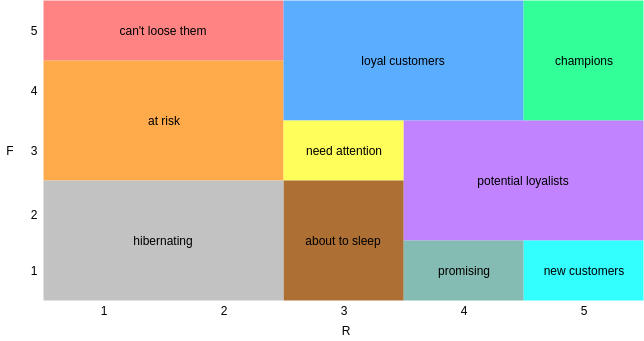

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Segment Analysis

In [ ]:
rfm[['recency','monetary','frequency','segment']].groupby('segment').agg({'mean','std','max','min'})

In [ ]:
data = go.Bar(y = pd.DataFrame(rfm['segment'].value_counts()).index,
              x = pd.DataFrame(rfm['segment'].value_counts())['segment'].values,
              name = str(pd.DataFrame(rfm['segment'].value_counts())['segment'].values),
              orientation='h')

layout = go.Layout(title={'text': "Number of Customer by Segments",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis =dict(title='Customers'),
                   template = 'plotly_white')

fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(range=[0,1300])
iplot(fig)

In [ ]:
fig = go.Figure()
for i in rfm['segment'].unique():
    fig.add_trace(go.Scatter(x=rfm[rfm['segment']==i]['recency'],
                           y=rfm[rfm['segment']==i]['frequency'],
                           mode='markers', name=str(i),showlegend = True,
                           marker = dict(size = 10,opacity = 0.6)))

fig.update_layout(title={'text': "Recency & Frequency by Segments",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  legend=dict(x=0.8,
                              y=1,
                              bgcolor='rgba(255, 255, 255, 0)'),
                  xaxis = dict(title='Recency'),
                  yaxis=dict(title='Frequency'),
                  template='plotly_white')

fig.show()

<a id = "6"></a>
<span style=" font-family:Verdana; font-size:220%; color:#31A919; ">K-Means Clustering</span>

In [ ]:
kmeans_data = rfm.loc[:,['recency_score','frequency_score']]

inertia=[]
k = [1,2,3,4,5,6,7,8,9]
for i in k:
    kmean=KMeans(n_clusters=i)
    kmean.fit(kmeans_data)
    inertia.append(kmean.inertia_)
    
data = go.Scatter(x=k, y=inertia,mode='lines+markers',marker=dict(size=10))

layout = go.Layout(title={'text': "Elbow Method",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   width=650,
                   height=470,
                   xaxis = dict(title='Number of Clusters'),
                   yaxis =dict(title='Sum of Squared Distance'),
                   template = 'plotly_white')

fig =go.Figure(data=data,layout=layout)
iplot(fig)

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Silhouette Score

In [ ]:
kmeans = KMeans(n_clusters = 3,random_state = 42)
kmeans.fit(kmeans_data)
print('Silhouette Score: {}'.format(round(metrics.silhouette_score(kmeans_data, kmeans.labels_),3)))

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Segment Analysis

In [ ]:
rfm['k_means_segment'] = kmeans.labels_
rfm['k_means_segment'] = rfm['k_means_segment'].astype(str)
rfm[['recency','monetary','frequency','k_means_segment']].groupby('k_means_segment').agg({'mean','std','max','min'})

In [ ]:
data = go.Bar(y = pd.DataFrame(rfm['k_means_segment'].value_counts()).index,
              x = pd.DataFrame(rfm['k_means_segment'].value_counts())['k_means_segment'].values,
              name = str(pd.DataFrame(rfm['k_means_segment'].value_counts())['k_means_segment'].values),
              orientation='h')

layout = go.Layout(title={'text': "Number of Customer by K-Means Segments",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis =dict(title='Customers'),
                   template = 'plotly_white')

fig=go.Figure(data=data, layout=layout)
fig.update_xaxes(range=[0,1900])
iplot(fig)

In [ ]:
fig = make_subplots(rows=2,cols=3)

fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='0']['recency'],showlegend=False,
                     name = '0',marker_color='#1760E1'),row=1,col=1)
fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='1']['recency'],showlegend=False,
                     name = '1',marker_color='#EB1919'),row=1,col=2)
fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='2']['recency'],showlegend=False,
                     name = '2',marker_color='#E8EB19'),row=1,col=3)
fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='0']['frequency'],showlegend=False,
                     name = '0',marker_color='#1760E1'),row=2,col=1)
fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='1']['frequency'],showlegend=False,
                     name = '1',marker_color='#EB1919'),row=2,col=2)
fig.add_trace(go.Box(y =rfm[rfm['k_means_segment']=='2']['frequency'],showlegend=False,
                     name = '2',marker_color='#E8EB19'),row=2,col=3)

fig.update_layout(title={'text': "Frequency & Recency by K-Means Segments",'y':0.9,'x':0.5,'xanchor': 'center',
        'yanchor': 'top'},template='plotly')

fig.update_yaxes(title_text="Recency", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=2, col=1)
iplot(fig)

<a id = "7"></a>
<span style=" font-family:Verdana; font-size:220%; color:#31A919; ">Customer Lifetime Value</span>

Customer lifetime value is how much money a customer will bring your brand throughout their entire time as a paying customer.

In [ ]:
cltv_df = df.groupby('CustomerID').agg({'InvoiceDate': [lambda invoice_date: (invoice_date.max() - invoice_date.min()).days,
                                                        lambda invoice_date: (today_date - invoice_date.min()).days], 
                                        'InvoiceNo': lambda invoice: invoice.nunique(),
                                        'TotalPrice': lambda total_price: total_price.sum()})

cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
cltv_df.head()

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Average Order Value

In [ ]:
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Recency & Tenure 

In [ ]:
cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Frequency

In [ ]:
cltv_df = cltv_df[(cltv_df['frequency'] > 1)]

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
BG/NBD
    
BG/NBD models assume  that  the  number  of  transactions  made  by  each customer follows a Poisson process with a heterogeneity in transaction  rates  across  customers  following  a  gamma distribution. These assumptions give us a Negative binomial distribution (NBD) for modeling the number of transactions made by the customer while he is alive.

In [ ]:
bgf = BetaGeoFitter(penalizer_coef=0.001) #avoid overfitting

bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Top 10 Expected Number of Transaction (1 Week)

In [ ]:
bgf.conditional_expected_number_of_purchases_up_to_time(1,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sort_values(ascending=False).head(10)

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Top 10 Expected Number of Transaction (1 Month)

In [ ]:
bgf.conditional_expected_number_of_purchases_up_to_time(4,
                                                        cltv_df['frequency'],
                                                        cltv_df['recency'],
                                                        cltv_df['T']).sort_values(ascending=False).head(10)

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Total Expected Number of Transaction (1 Month)

In [ ]:
bgf.predict(4,
            cltv_df['frequency'],
            cltv_df['recency'],
            cltv_df['T']).sum()

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Frequency of Repeat Transactions

In [ ]:
plot_period_transactions(bgf)
plt.show()

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Gamma - Gamma Submodel
    
The Gamma-Gamma Model can predict the most likely value per transaction in the future.   
 
The properties of Gamma-Gamma model are:
1. Monetary value of users’ transactions is random around their mean transaction value.
2. Mean transaction value varies across users but doesn’t vary for an individual user over time.
3. Mean transaction values is Gamma distributed across customers.

In [ ]:
ggf = GammaGammaFitter(penalizer_coef=0.01)

ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Top 10 Expected Average Profit

In [ ]:
ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                        cltv_df['monetary']).sort_values(ascending=False).head(10)

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
CLTV

In [ ]:
cltv = ggf.customer_lifetime_value(bgf,cltv_df['frequency'],
                                   cltv_df['recency'],cltv_df['T'],
                                   cltv_df['monetary'],time=6,
                                   freq="W",discount_rate=0.01)

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Top 10 CLTV (6 Months)

In [ ]:
cltv = cltv.reset_index()
cltv.sort_values(by="clv", ascending=False).head(10)

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Segmentation

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(cltv[["clv"]])
cltv["scaled_clv"] = scaler.transform(cltv[["clv"]])

cltv["segment"] = pd.qcut(cltv["scaled_clv"], 4, labels=["D", "C", "B", "A"])
cltv.head()

<span style="color:#31A919;
             font-size:180%;
             font-family:Verdana;">
Segment Analysis

In [ ]:
fig = make_subplots(rows=2,
                    cols=2,
                    subplot_titles=("A", "B",'C','D'))

fig.add_trace(go.Box(y =cltv[cltv['segment']=='A']['clv'],showlegend=False,
                     name = 'A',
                     marker_color='#1760E1'),row=1,col=1)
fig.add_trace(go.Box(y =cltv[cltv['segment']=='B']['clv'],showlegend=False,
                     name = 'B',
                     marker_color='#1760E1'),row=1,col=2)
fig.add_trace(go.Box(y =cltv[cltv['segment']=='C']['clv'],showlegend=False,
                     name = 'C',
                     marker_color='#1760E1'),row=2,col=1)
fig.add_trace(go.Box(y =cltv[cltv['segment']=='D']['clv'],showlegend=False,
                     name = 'D',
                     marker_color='#1760E1'),row=2,col=2)

fig.update_layout(title={'text': "CLTV by SEGMENTS",
                         'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly')      
iplot(fig)

In [ ]:
data = go.Bar(x = cltv.groupby('segment').agg({'clv':'mean'}).reset_index()['segment'],
              y = cltv.groupby('segment').agg({'clv':'mean'}).reset_index()['clv'],
              text = round(cltv.groupby('segment').agg({'clv':'mean'}).reset_index()['clv'],3),
              textposition= 'auto',
              marker = dict(color = 'darkorange'))

layout = go.Layout(title={'text': "Average CLV by Segments",
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis = dict(title='Segment'),
                   yaxis =dict(title='CLV'),
                   template = 'plotly_white')

fig=go.Figure(data=data, layout=layout)
fig.update_yaxes(range=[0,5100])
iplot(fig)